<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-wsn/blob/PART1/integer_linear_programming_ILP(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##prepar  

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from folium.plugins import HeatMap
import seaborn as sns



import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%ls "/content/drive/MyDrive/Foundations_of_data_Science/NYC_air_quality.csv'

/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [4]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 18.6 MB/s eta 0:00:00


In [5]:
local_file_path = '/content/drive/MyDrive/Foundations_of_data_Science/NYC_air_quality.csv'

In [6]:
web_file_path = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv"

In [7]:
pollution = pd.read_csv(web_file_path)

In [8]:
pollution.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [9]:
type(pollution)

pandas.core.frame.DataFrame

In [10]:
#columns
len(pollution)

169999

In [11]:
#rows and columns
pollution.shape

(169999, 31)

In [12]:
#data types
pollution.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

Analyze the time

In [13]:
pollution['datetime_series'] = pd.to_datetime(pollution['time'], unit='s')

In [14]:
print(pollution['datetime_series'])

0        2021-09-10 12:35:04
1        2021-09-10 12:35:08
2        2021-09-10 12:35:13
3        2021-09-10 12:35:18
4        2021-09-10 12:35:23
                 ...        
169994   2021-09-12 14:31:49
169995   2021-09-12 14:31:54
169996   2021-09-12 14:31:59
169997   2021-09-12 14:32:04
169998   2021-09-12 14:32:09
Name: datetime_series, Length: 169999, dtype: datetime64[ns]


In [15]:
pollution['PerTime'] = pollution['datetime_series'].dt.time

In [16]:
pollution.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25,datetime_series,PerTime
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,23.7,57.3,4.508813,2021-09-10 12:35:04,12:35:04
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,23.7,57.8,5.462420,2021-09-10 12:35:08,12:35:08
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,23.7,57.8,5.154881,2021-09-10 12:35:13,12:35:13
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,23.6,57.6,4.508813,2021-09-10 12:35:18,12:35:18
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,23.6,57.5,5.539503,2021-09-10 12:35:23,12:35:23


In [17]:
pollution['Perhour'] = pollution['datetime_series'].dt.hour

In [18]:
pollution.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin20,bin21,bin22,bin23,temperature,humidity,pm25,datetime_series,PerTime,Perhour
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,23.7,57.3,4.508813,2021-09-10 12:35:04,12:35:04,12
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,23.7,57.8,5.462420,2021-09-10 12:35:08,12:35:08,12
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,23.7,57.8,5.154881,2021-09-10 12:35:13,12:35:13,12
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,23.6,57.6,4.508813,2021-09-10 12:35:18,12:35:18,12
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,23.6,57.5,5.539503,2021-09-10 12:35:23,12:35:23,12


ploting by time(per hour for each sensor)

In [19]:
a= pollution[pollution['SensorID'] == 'NYCP2_CS01A']
a.shape

(137455, 34)

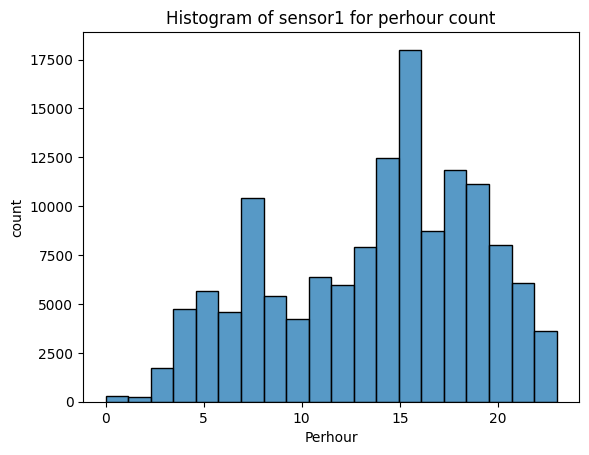

In [20]:
a = pollution[pollution['SensorID'] == 'NYCP2_CS01A']
y_column = 'Perhour'

sns.histplot(data=a, x=y_column, bins=20)
plt.xlabel('Perhour')
plt.ylabel('count')
plt.title('Histogram of sensor1 for perhour count')
plt.show()

In [21]:
a= pollution[pollution['SensorID'] == 'NYCP2_CS02A']
a.shape

(24044, 34)

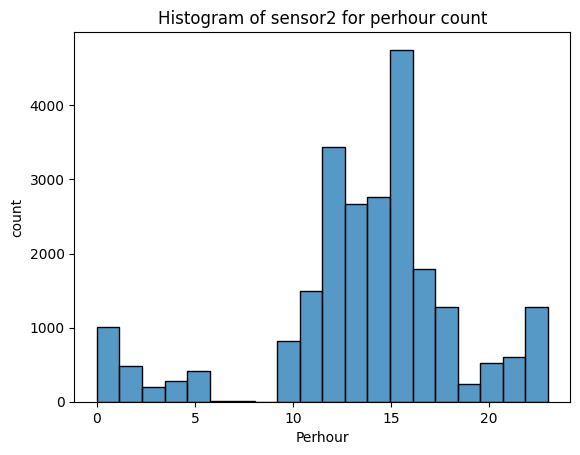

In [22]:
a = pollution[pollution['SensorID'] == 'NYCP2_CS02A']
y_column = 'Perhour'

sns.histplot(data=a, x=y_column, bins=20)
plt.xlabel('Perhour')
plt.ylabel('count')
plt.title('Histogram of sensor2 for perhour count')
plt.show()

In [23]:
a= pollution[pollution['SensorID'] == 'NYCP2_CS03A']
a.shape

(8500, 34)

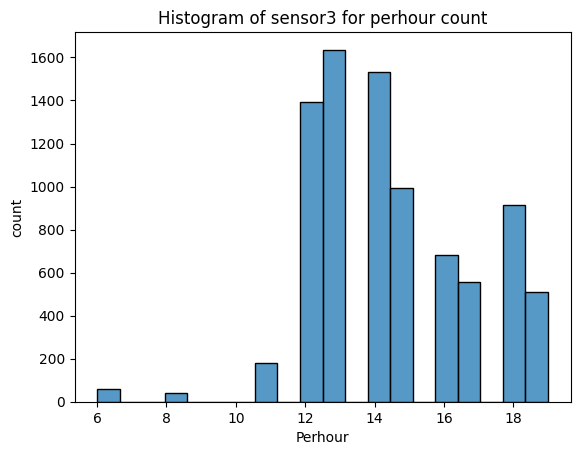

In [24]:
a = pollution[pollution['SensorID'] == 'NYCP2_CS03A']
y_column = 'Perhour'

sns.histplot(data=a, x=y_column, bins=20)
plt.xlabel('Perhour')
plt.ylabel('count')
plt.title('Histogram of sensor3 for perhour count')
plt.show()

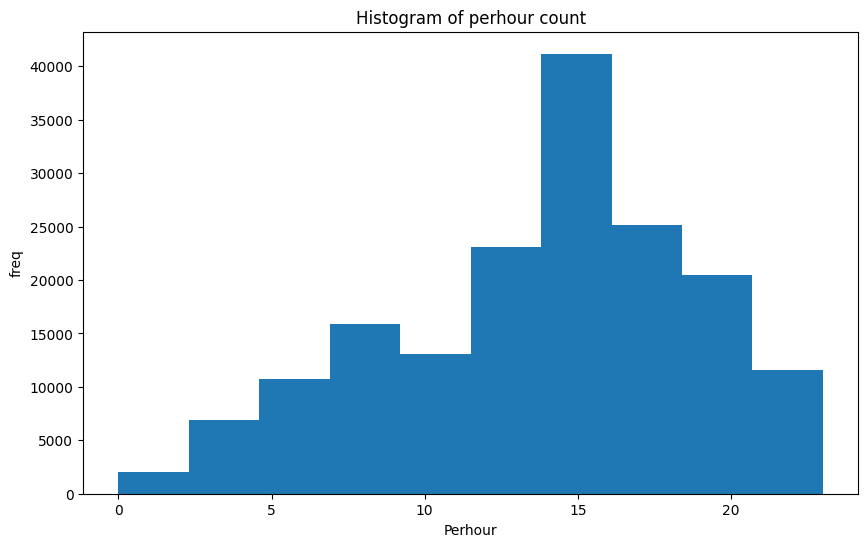

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(pollution['Perhour'])
plt.xlabel('Perhour')
plt.ylabel('freq')
plt.title('Histogram of perhour count')
plt.show()

Remove erroneous coordinates (0,0) from the dataset

In [26]:
pollution = \
pollution[(pollution['latitude'] != 0 ) & \
(pollution['longitude']!=0 )]

In [27]:
len(pollution)

169999

## Geohash

In [28]:
!pip install pygeohash

  Preparing metadata (setup.py) ... done
  Created wheel for pygeohash: filename=pygeohash-1.2.0-py2.py3-none-any.whl size=6152 sha256=821a078e40186b6163a2083976c8b527e097c1ebcae354cdfe8a83de5c8c2c8a
  Stored in directory: /root/.cache/pip/wheels/28/ec/b6/beadf7295a623f528507691fb0d471b50d064ae9bbad420b8f
Successfully built pygeohash


In [29]:
import pygeohash as gh

In [30]:
geohash_precision = 6
# 6 provide a moderate level of precision suitable for representing a neighborhood or similar-sized area.
pollution['geohash']=pollution.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)

In [31]:
pollution.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin21,bin22,bin23,temperature,humidity,pm25,datetime_series,PerTime,Perhour,geohash
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,23.7,57.3,4.508813,2021-09-10 12:35:04,12:35:04,12,dr72rh
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,23.7,57.8,5.462420,2021-09-10 12:35:08,12:35:08,12,dr72rh
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,23.7,57.8,5.154881,2021-09-10 12:35:13,12:35:13,12,dr72rh
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,23.6,57.6,4.508813,2021-09-10 12:35:18,12:35:18,12,dr72rh
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,23.6,57.5,5.539503,2021-09-10 12:35:23,12:35:23,12,dr72rh


<font color = 'blue' size=8> supervisor comments </font>
- TODO:
  - this plot is insufficient, draw other maps, showing coropleth and heatmap, have a look at the examples attached, which we covered in the class!

<ipython-input-32-485bded29f70>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


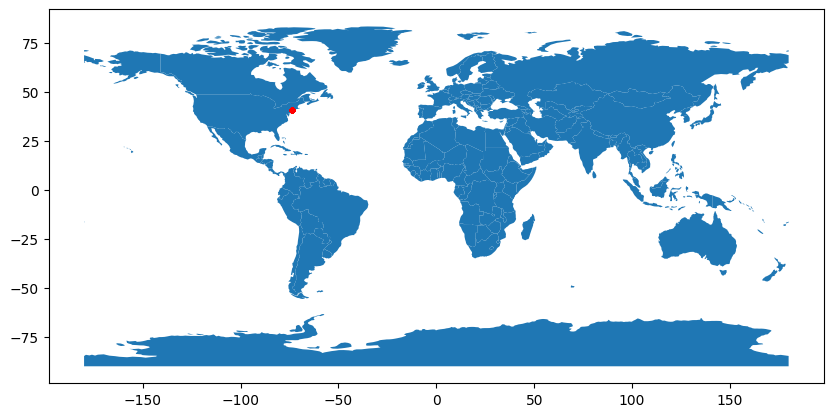

In [32]:
pollution['latitude'] = pollution.apply(lambda x: gh.decode(x.geohash)[0], axis=1)
pollution['longitude'] = pollution.apply(lambda x: gh.decode(x.geohash)[1], axis=1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(pollution, geometry=gpd.points_from_xy(pollution.longitude, pollution.latitude))

# Plot the points on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=10)
plt.show()

geomatry points(without convert to datframe)

<font color = 'blue' size=8> supervisor comments </font>
- what is the purpose of those analytics

In [33]:
type(pollution)

pandas.core.frame.DataFrame

In [34]:
#to find latitude and longitude for the first 5 rows
for lat, lon in zip(pollution['latitude'][:5], pollution['longitude'][:5]):
    geometry = lat, lon
    print(geometry)

(40.85, -73.9)
(40.85, -73.9)
(40.85, -73.9)
(40.85, -73.9)
(40.85, -73.9)


In [35]:
#to see the geometry for the first 5 rows
pollution['geometry'] = pollution.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
pollution_gdf = gpd.GeoDataFrame(pollution, crs='EPSG:4326', geometry='geometry')
pollution_gdf.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin22,bin23,temperature,humidity,pm25,datetime_series,PerTime,Perhour,geohash,geometry
0,NYCP2_CS01A,1631277304,40.85,-73.9,11,1,1,0,0,0,...,0,0,23.7,57.3,4.508813,2021-09-10 12:35:04,12:35:04,12,dr72rh,POINT (-73.90000 40.85000)
1,NYCP2_CS01A,1631277308,40.85,-73.9,22,4,1,0,0,2,...,0,0,23.7,57.8,5.462420,2021-09-10 12:35:08,12:35:08,12,dr72rh,POINT (-73.90000 40.85000)
2,NYCP2_CS01A,1631277313,40.85,-73.9,40,1,1,0,0,1,...,0,0,23.7,57.8,5.154881,2021-09-10 12:35:13,12:35:13,12,dr72rh,POINT (-73.90000 40.85000)
3,NYCP2_CS01A,1631277318,40.85,-73.9,26,1,0,0,0,0,...,0,0,23.6,57.6,4.508813,2021-09-10 12:35:18,12:35:18,12,dr72rh,POINT (-73.90000 40.85000)
4,NYCP2_CS01A,1631277323,40.85,-73.9,44,4,0,1,0,0,...,0,0,23.6,57.5,5.539503,2021-09-10 12:35:23,12:35:23,12,dr72rh,POINT (-73.90000 40.85000)


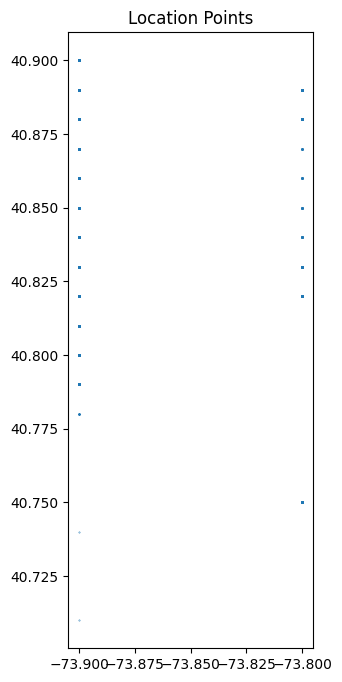

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
pollution_gdf.plot(markersize=0.1,ax=ax);
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_title('Location Points')
plt.show()


In [37]:
pollution_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<font color = 'blue' size=8> supervisor comments </font>
- TODO:
  - this did not run! It is showing <font color='red'> error</font>. Check what is the problem and correct it!

In [39]:
'''fig, ax = plt.subplots(figsize=(10, 5))
buf100.plot(color = 'lightblue', ax=ax);
buf50.plot(ax=ax, color='lightyellow')
buf10.plot(ax=ax, color='gray');
point1.plot(ax=ax, color='black')
plt.show()'''

"fig, ax = plt.subplots(figsize=(10, 5))\nbuf100.plot(color = 'lightblue', ax=ax);\nbuf50.plot(ax=ax, color='lightyellow')\nbuf10.plot(ax=ax, color='gray');\npoint1.plot(ax=ax, color='black')\nplt.show()"

##geojson file

In [40]:
geojson_file_web = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson"

In [ ]:
#geojson_file = "/content/drive/MyDrive/Foundations_of_data_Science/nyc_polygon.geojson"


In [41]:
# BASELINE: original Neighbourhoods
neighborhoods_original = gpd.read_file(geojson_file_web)

In [42]:
neighborhoods_original.shape

(310, 5)

In [43]:
neighborhoods_original.head()

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."


In [44]:
neighborhoods_original.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
sjoined_pollution_original = gpd.sjoin(pollution_gdf, neighborhoods_original, predicate="within")
sjoined_pollution_original.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,datetime_series,PerTime,Perhour,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id
0,NYCP2_CS01A,1631277304,40.85,-73.9,11,1,1,0,0,0,...,2021-09-10 12:35:04,12:35:04,12,dr72rh,POINT (-73.90000 40.85000),105,Fordham,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
1,NYCP2_CS01A,1631277308,40.85,-73.9,22,4,1,0,0,2,...,2021-09-10 12:35:08,12:35:08,12,dr72rh,POINT (-73.90000 40.85000),105,Fordham,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
2,NYCP2_CS01A,1631277313,40.85,-73.9,40,1,1,0,0,1,...,2021-09-10 12:35:13,12:35:13,12,dr72rh,POINT (-73.90000 40.85000),105,Fordham,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
3,NYCP2_CS01A,1631277318,40.85,-73.9,26,1,0,0,0,0,...,2021-09-10 12:35:18,12:35:18,12,dr72rh,POINT (-73.90000 40.85000),105,Fordham,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
4,NYCP2_CS01A,1631277323,40.85,-73.9,44,4,0,1,0,0,...,2021-09-10 12:35:23,12:35:23,12,dr72rh,POINT (-73.90000 40.85000),105,Fordham,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...


In [46]:
type(sjoined_pollution_original)

geopandas.geodataframe.GeoDataFrame

In [47]:
sjoined_pollution_original.shape

(167994, 41)

In [48]:
n = len(pd.unique(sjoined_pollution_original['neighborhood']))

print("No.of.unique name values :", n)

No.of.unique name values : 12


In [49]:
unique_values = sjoined_pollution_original['neighborhood'].unique()
print(f"Unique values in column '{'neighborhood'}: {unique_values}")

Unique values in column 'neighborhood: ['Fordham' 'Claremont Village' 'Flushing' 'Morrisania' 'Longwood'
 'Port Morris' 'Ditmars Steinway' 'Kingsbridge' 'Fieldston'
 'Pelham Bay Park' 'Maspeth' 'Ridgewood']


##sampling(stratified sampling)

In [50]:
# Stratified sampling= group data by the 'neighborhood' column and then applying a sampling operation to each group
%%time
sampling_fraction = 0.6
sampled_geohash_data_base= sjoined_pollution_original.groupby('neighborhood').apply(lambda x: x.sample(frac=sampling_fraction))

CPU times: user 475 ms, sys: 8.31 ms, total: 483 ms
Wall time: 869 ms


In [51]:
sampled_geohash_data_base.shape

(100798, 41)

In [52]:
#take only readings greater than specific threshold to count reading in each polygon greater than that threshold
sampled_geohash_data_base = sampled_geohash_data_base[sampled_geohash_data_base.pm25>= 3 ]

In [53]:
sampled_geohash_data_base.head()

SensorID        time  latitude  longitude  bin0  \
neighborhood                                                                   
Claremont Village 102622  NYCP2_CS01A  1636448680     40.84      -73.9   135   
                  18567   NYCP2_CS01A  1632732411     40.84      -73.9    60   
                  53982   NYCP2_CS01A  1633585298     40.84      -73.9   172   
                  69428   NYCP2_CS01A  1634117412     40.84      -73.9   384   
                  134049  NYCP2_CS01A  1639112380     40.84      -73.9    42   

                          bin1  bin2  bin3  bin4  bin5  ...  \
neighborhood                                            ...   
Claremont Village 102622     5     0     0     1     1  ...   
                  18567      7     3     1     0     1  ...   
                  53982     22     4     0     2     0  ...   
                  69428     22     1     2     3     1  ...   
                  134049     0     0     0     2     0  ...   

                             datetime_series   PerTime  Perhour  geohash  \
neighborhood                                                               
Claremont Village 102622 2021-11-09 09:04:40  09:04:40        9   dr72r5   
                  18567  2021-09-27 08:46:51  08:46:51        8   dr72r5   
                  53982  2021-10-07 05:41:38  05:41:38        5   dr72r5   
                  69428  2021-10-13 09:30:12  09:30:12        9   dr72r5   
                  134049 2021-12-10 04:59:40  04:59:40        4   dr72r5   

                                            geometry  index_right  \
neighborhood                                                        
Claremont Village 102622  POINT (-73.90000 40.84000)           57   
                  18567   POINT (-73.90000 40.84000)           57   
                  53982   POINT (-73.90000 40.84000)           57   
                  69428   POINT (-73.90000 40.84000)           57   
                  134049  POINT (-73.90000 40.84000)           57   

                               neighborhood  boroughCode  borough  \
neighborhood                                                        
Claremont Village 102622  Claremont Village            2    Bronx   
                  18567   Claremont Village            2    Bronx   
                  53982   Claremont Village            2    Bronx   
                  69428   Claremont Village            2    Bronx   
                  134049  Claremont Village            2    Bronx   

                                                                        @id  
neighborhood                                                                 
Claremont Village 102622  http://nyc.pediacities.com/Resource/Neighborho...  
                  18567   http://nyc.pediacities.com/Resource/Neighborho...  
                  53982   http://nyc.pediacities.com/Resource/Neighborho...  
                  69428   http://nyc.pediacities.com/Resource/Neighborho...  
                  134049  http://nyc.pediacities.com/Resource/Neighborho...  

[5 rows x 41 columns]

In [54]:
sampled_geohash_data_base.shape

(78685, 41)

In [55]:
n = len(pd.unique(sampled_geohash_data_base['neighborhood']))
print("No.of.unique name values :", n)

No.of.unique name values : 12


In [56]:
type("pm25")

str

## Choropleth Maps

In [57]:
# sampled2 data
NYC_pollution_sample2= sampled_geohash_data_base['neighborhood'].value_counts()
NYC_pollution_sample2 = NYC_pollution_sample2.reset_index()
NYC_pollution_sample2.columns = ['neighborhood','count']
NYC_pollution_sample2['neighborhood'] = NYC_pollution_sample2['neighborhood'].astype(str)

In [58]:
# sampled3 data
NYC_pollution_sample3= sampled_geohash_data_base['pm25'].value_counts()
NYC_pollution_sample3 = NYC_pollution_sample3.reset_index()
NYC_pollution_sample3.columns = ['pm25','Level']
NYC_pollution_sample3['pm25'] = NYC_pollution_sample3['pm25'].astype(str)

In [59]:
# original data
NYC_pollution_original= sjoined_pollution_original['neighborhood'].value_counts()
NYC_pollution_original = NYC_pollution_original.reset_index()
NYC_pollution_original.columns = ['neighborhood','count']
NYC_pollution_original['neighborhood'] = NYC_pollution_original['neighborhood'].astype(str)

In [60]:
NYC_pollution_original.head()

,neighborhood,count
0,Port Morris,52022
1,Longwood,52000
2,Claremont Village,36463
3,Fordham,16143
4,Morrisania,8538


In [61]:
NYC_pollution_sample2.head()

,neighborhood,count
0,Port Morris,25223
1,Longwood,24775
2,Claremont Village,16562
3,Fordham,6918
4,Morrisania,4007


In [62]:
#reference geo-map
NYC_pollution_original["neighborhood"].astype(str)
geo_path = r'https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson'
heatmap_scale = list()
threshold = [10,20,50,70,85,100]
for i in threshold :
    heatmap_scale.append(int(NYC_pollution_original['count'].max() * (i/100.0)))

map_NYC_pollution_sample = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
map_NYC_pollution_sample.choropleth(geo_data=geo_path, data=NYC_pollution_original, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'count'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Number of unique neighborhood')

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<font color = 'blue' size=8> supervisor comments </font>
- TODO:
  - this did not run! It is showing <font color='red'> `TypeError: unsupported operand type(s) for /: 'str' and 'float`</font>. Check what is the problem and correct it!

In [65]:
#base geo-map (without Douglas Algorithm)
'''
NYC_pollution_sample3["pm25"].astype(str)
geo_path = r'https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson'
heatmap_scale = list()
threshold = [0, 3, NYC_pollution_sample3['pm25'].max()]
NYC_pollution_sample3['Level'] = pd.to_numeric(NYC_pollution_sample3['Level'], errors='coerce')

for i in threshold:
    heatmap_scale.append(int(NYC_pollution_sample3['Level'].max() * (i/100.0)))

map_NYC_pollution_sample3 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
map_NYC_pollution_sample3.choropleth(geo_data=geo_path, data=NYC_pollution_sample3, \
                data_out='nyc_zip_test.json',
             columns=['pm25', 'Level'],
             threshold_scale=threshold,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9, nan_fill_color='white',
             legend_name='Level of pm25')'''

'\nNYC_pollution_sample3["pm25"].astype(str)\ngeo_path = r\'https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson\'\nheatmap_scale = list()\nthreshold = [0, 3, NYC_pollution_sample3[\'pm25\'].max()]\nNYC_pollution_sample3[\'Level\'] = pd.to_numeric(NYC_pollution_sample3[\'Level\'], errors=\'coerce\')\n\nfor i in threshold:\n    heatmap_scale.append(int(NYC_pollution_sample3[\'Level\'].max() * (i/100.0)))\n\nmap_NYC_pollution_sample3 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)\nmap_NYC_pollution_sample3.choropleth(geo_data=geo_path, data=NYC_pollution_sample3,                 data_out=\'nyc_zip_test.json\',\n             columns=[\'pm25\', \'Level\'],\n             threshold_scale=threshold,\n             key_on=\'feature.properties.neighborhood\',\n             fill_color=\'YlOrRd\', fill_opacity=0.9, line_opacity=0.9, nan_fill_color=\'white\',\n             legend_name=\'Level of pm25\')'

In [68]:
#map_NYC_pollution_sample3

In [70]:
#base geo-map (without Douglas Algorithm)
'''NYC_pollution_sample2["neighborhood"].astype(str)
geo_path = r'/content/drive/MyDrive/Foundations_of_data_Science/nyc_polygon.geojson'
heatmap_scale = list()
threshold = [10,20,50,70,85,100]
for i in threshold :
    heatmap_scale.append(int(NYC_pollution_sample2['count'].max() * (i/100.0)))

map_NYC_pollution_sample = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
map_NYC_pollution_sample.choropleth(geo_data=geo_path, data=NYC_pollution_sample2, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'count'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Number of unique neighborhood')'''

'NYC_pollution_sample2["neighborhood"].astype(str)\ngeo_path = r\'/content/drive/MyDrive/Foundations_of_data_Science/nyc_polygon.geojson\'\nheatmap_scale = list()\nthreshold = [10,20,50,70,85,100]\nfor i in threshold :\n    heatmap_scale.append(int(NYC_pollution_sample2[\'count\'].max() * (i/100.0)))\n\nmap_NYC_pollution_sample = folium.Map(location=[40.730610, -73.935242], zoom_start=10)\nmap_NYC_pollution_sample.choropleth(geo_data=geo_path, data=NYC_pollution_sample2,                 data_out = \'nyc_zip_test.json\',\n             columns=[\'neighborhood\', \'count\'],\n             #threshold_scale= heatmap_scale,\n             key_on=\'feature.properties.neighborhood\',\n             fill_color=\'YlOrRd\', fill_opacity=0.9, line_opacity=0.9,nan_fill_color=\'white\',\n             legend_name=\'Number of unique neighborhood\')'

In [71]:
map_NYC_pollution_sample

##heatmap

In [72]:
NYC_pollution_original.dtypes

neighborhood    object
count            int64
dtype: object

In [73]:
heatmap_data = sjoined_pollution_original[['longitude','latitude','neighborhood']].groupby(['neighborhood'], as_index=False).agg({'longitude': 'first', 'latitude': 'first','neighborhood':'count'})

In [74]:
heatmap_data.rename(columns={'neighborhood': 'count'}, inplace=True)

In [75]:
new_heatmap_data=heatmap_data.sort_values(by='count', ascending=False)

In [76]:
new_heatmap_data.head()

,longitude,latitude,count
10,-73.9,40.81,52022
6,-73.9,40.82,52000
0,-73.9,40.84,36463
4,-73.9,40.85,16143
8,-73.9,40.83,8538


In [77]:
heatmap_data1 = new_heatmap_data.values.tolist()

In [78]:
pollution.dtypes

SensorID                   object
time                        int64
latitude                  float64
longitude                 float64
bin0                        int64
bin1                        int64
bin2                        int64
bin3                        int64
bin4                        int64
bin5                        int64
bin6                        int64
bin7                        int64
bin8                        int64
bin9                        int64
bin10                       int64
bin11                       int64
bin12                       int64
bin13                       int64
bin14                       int64
bin15                       int64
bin16                       int64
bin17                       int64
bin18                       int64
bin19                       int64
bin20                       int64
bin21                       int64
bin22                       int64
bin23                       int64
temperature               float64
humidity      

In [79]:
pollution['count'] = 1

In [80]:
pollution[['latitude', 'longitude', 'count']].sample(n=10000)

,latitude,longitude,count
12394,40.84,-73.9,1
151632,40.83,-73.8,1
12819,40.84,-73.9,1
124429,40.82,-73.9,1
66871,40.90,-73.9,1
...,...,...,...
54646,40.81,-73.9,1
123638,40.82,-73.9,1
18609,40.84,-73.9,1
74847,40.81,-73.9,1


In [81]:
len(pollution[['latitude', 'longitude', 'count']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

20

In [82]:
def generateBaseMap(default_location=[40.7306, -73.935], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [83]:
base_map = generateBaseMap()
HeatMap(data=pollution[['latitude', 'longitude', 'count']].sample(n=10000).groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [84]:
base_map

A dictionary called vars is created which contains the LP variables. The reference keys to the dictionary are the warehouse name, then the bar name([“A”][“2”]) , and the data is Route_Tuple. (e.g. [“A”][“2”]: Route_A_2). The lower limit of zero is set, the upper limit of None is set, and the variables are defined to be Integers.



```
A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Warehouses, Bars), 0, None, LpInteger)
```

[pulp](https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html)

<font color = 'blue' size=8> supervisor comments </font>
- TODO:
  - explain in details, every single piece of code you applied here from pulp in the context of your data, what does it mean exactly, what does each dictionary, array mean for your data?!

In [85]:
import pandas as pd
import pulp
from math import radians, sin, cos, sqrt, atan2

def distance(lat1, lon1, lat2, lon2):
    # Calculate the distance between two points using Haversine formula
    R = 6371.0  # Radius of the Earth in kilometers
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
problem =None
def minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold):
    # Read pollution data from CSV file
    data = pd.read_csv(csv_file)

    # Initialize the ILP problem
    problem = LpProblem("MinimumCostDeployment", LpMinimize)

    # Decision variables
    num_sites = len(data)
     #to LpBinary to decide wether to deploy a sensor in each site or not, currently every point is considered a potential site,
     #we want to change this behavious so that those sites that we select are based on an adapted version of the DBSCAN ()
     # in this adapted version, sites are those with points that are geographically nearby and at the same time having minimized
     # variance in the pm values,
    sensors = LpVariable.dicts("Sensor", range(num_sites), cat=LpBinary)
    print(sensors)

    # Objective function: minimize cost
    problem += lpSum([sensors[i] for i in range(num_sites)])

    # Constraints: pollution coverage
    for i in range(num_sites):
        problem += lpSum([sensors[j] for j in range(num_sites) if distance(data['latitude'][i], data['longitude'][i], data['latitude'][j], data['longitude'][j]) <= coverage_threshold]) >= 1

    # Constraint: budget constraint
    problem += lpSum([sensors[i] for i in range(num_sites)]) <= budget

    # Solve the problem
    problem.solve()
    # The status of the solution is printed to the screen
    print("Status:", LpStatus[problem.status])
    # Extract solution
    solution = []
    for i in range(num_sites):
        if sensors[i].varValue == 1:
            solution.append(i)

    return solution



In [86]:
from pulp import *

<font color = 'blue' size=8> supervisor comments </font>
- TODO:
  - profile the data!!!
  - divide it into subsets, a subset for each hour (also for each day, part of day [morning, afternoon and evening]).
  - store the data subsets in a folder in your repository on a .csv format!
  - explain in details what does it mean by `budget`, `coverage_threshold`, `connectivity_threshold`

 <font color='red' size=8> **ATTENTION** You are getting `Status: Infeasible` when you run the code below, check why?!!!, we should get `Status: optimal` instead </font>

 [similar](https://stackoverflow.com/questions/62825461/what-it-mean-when-a-problem-has-a-status-of-1-after-solving-in-pythons-pulp-li)

 [what does it mean](https://coin-or.github.io/pulp/technical/constants.html)

 - in the example, `A Transportation Problem`, read
 ["If a transportation problem has more demand than supply, we can balance the problem using a dummy supply node. Note that with excess demand, the problem is “Infeasible” when unbalanced."](https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html). So what does Infeasible mean in your context. You should solve this!

In [ ]:

# Example usage:
csv_file = "/content/drive/MyDrive/Papers/dynamic_programming/data/NYC_Pilot1_PM.csv"
budget = 5  # Example budget
coverage_threshold = 0.1  # Example coverage threshold in kilometers
connectivity_threshold = 10  # Example connectivity threshold in kilometers

# Call the function
solution = minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold)
print("Optimal sensor deployment:", solution)

<font color = 'blue' size=8> supervisor comments </font>
- TODO:
  - take the optimal locations of sensors in each hour, then draw a trajectory of all the hours of the day where each sensor should move. Since you have three sensors, this will result in three trajectories on the map
    - you need to calculate the coordinates (longitude, latitude) for each optimal location of the sensors in each hour, then convert the list into .csv file, then for each sensor, construct a linestring which represents the trajectory of that sensor, then store all those trajectories in a geojson file of linestrings, then display on an interactive map (showing the sensors moving in different directions from hour to next hour)!